In [1]:
import numpy
import kimmy
import astropy.units as u
import warnings
warnings.simplefilter('ignore')
# We didn't specify matplotlib as a dependency, so need to install it...
!pip install matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# ``kimmy``: example notebook

This notebook briefly covers some of the basic use of ``kimmy``, a python implementation of the simple chemical evolution model of [Weinberg et al. (2017)](http://adsabs.harvard.edu/abs/2017ApJ...837..183W).

Currently, only a simple one-zone chemical evolution model is implemented, with default parameters reflecting those describing the evolution of oxygen and iron. However, the code is flexible and given the correct yield parameters, could be used to do other elements (each element is allowed to have a prompt, SN II, component and a delayed, SN Ia, component). To setup the default model, do

In [2]:
oz= kimmy.OneZone()

To print the parameters of the default mode, simply print this object, which produces a nicely formatted list of parameters

In [3]:
print(oz)

eta       :	2.5
frac_Ia_2 :	0.522
mCC_Fe    :	0.0012
mCC_O     :	0.015
mIa_Fe    :	0.0017
mIa_O     :	0.0
min_dt_Ia :	0.15 Gyr
r         :	0.4
sfh       :	exp
solar_Fe  :	7.47
solar_O   :	8.69
tau_Ia    :	1.5 Gyr
tau_Ia_2  :	None
tau_SFE   :	1.0 Gyr
tau_SFH   :	6.0 Gyr


The code can currently compute the time evolution of the elements and their distribution at the present time (assumed to be 12.5 Gyr after the start of star formation). Parameters can be changed simply by setting their value, which will directly update the model (at any time you can ``print(oz)`` to know which parameters you are using and you can use ``oz.initial()`` to go back to the parameters that you used to initialize the object). 

For example, we can reproduce Fig. 2 in [Weinberg et al. (2017)](http://adsabs.harvard.edu/abs/2017ApJ...837..183W):

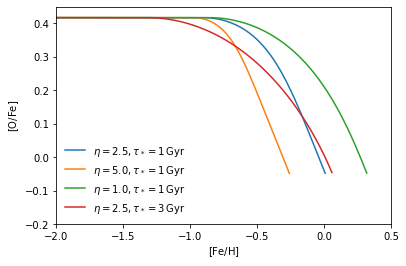

In [4]:
ts= numpy.linspace(0.001,10.,1001)*u.Gyr
oz.initial()
plot(oz.Fe_H(ts),oz.O_Fe(ts),label=r'$\eta= 2.5, \tau_* = 1\,\mathrm{Gyr}$')
# Higher outflow rate
oz.eta= 5.
plot(oz.Fe_H(ts),oz.O_Fe(ts),label=r'$\eta= 5.0, \tau_* = 1\,\mathrm{Gyr}$')
# Lower outflow rate
oz.eta= 1.
plot(oz.Fe_H(ts),oz.O_Fe(ts),label=r'$\eta= 1.0, \tau_* = 1\,\mathrm{Gyr}$')
# Longer SFE timescale, first reset
oz.initial()
oz.tau_SFE= 3.*u.Gyr
plot(oz.Fe_H(ts),oz.O_Fe(ts),label=r'$\eta= 2.5, \tau_* = 3\,\mathrm{Gyr}$')
xlabel(r'$[\mathrm{Fe/H}]$')
ylabel(r'$[\mathrm{O/Fe}]$')
xlim(-2.,0.5)
ylim(-0.2,0.45)
legend(frameon=False);

or Figure 3, which also illustrates how to change the shape of the star-formation history to Linear-exponential:

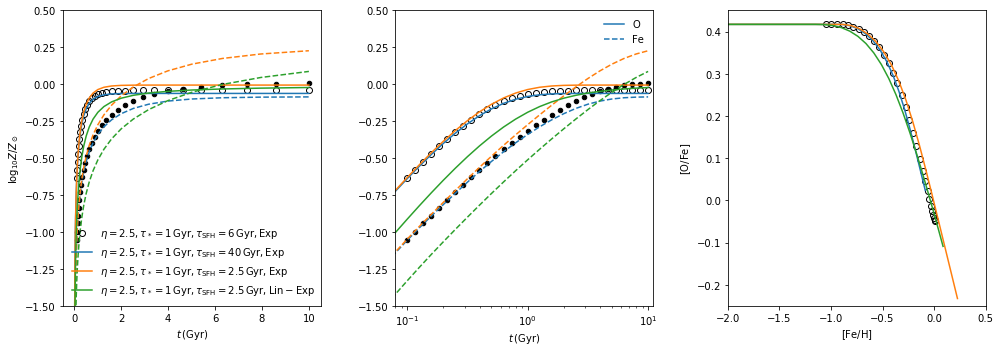

In [5]:
figsize(14,5)
ts= numpy.logspace(-1.,1.,31)*u.Gyr
colors= plt.rcParams['axes.prop_cycle'].by_key()['color']
subplot(1,3,1)
oz.initial()
plot(ts,oz.O_H(ts),'o',mfc='none',color='k',
     label=r'$\eta= 2.5, \tau_* = 1\,\mathrm{Gyr}, \tau_{\mathrm{SFH}} = 6\,\mathrm{Gyr}, \mathrm{Exp}$')
plot(ts,oz.Fe_H(ts),'.',ms=9.,color='k')
xlabel(r'$t\,(\mathrm{Gyr})$')
ylabel(r'$\log_{10} Z/Z_\odot$')
ylim(-1.5,0.5)
subplot(1,3,2)
semilogx(ts,oz.O_H(ts),'o',mfc='none',color='k')
semilogx(ts,oz.Fe_H(ts),'.',ms=9.,color='k')
xlim(0.08,11.)
xlabel(r'$t\,(\mathrm{Gyr})$')
ylim(-1.5,0.5)
subplot(1,3,3)
plot(oz.Fe_H(ts),oz.O_Fe(ts),'o',mfc='none',color='k')
ylim(-0.25,0.45)
xlim(-2.,0.5)
xlabel(r'$[\mathrm{Fe/H}]$')
ylabel(r'$[\mathrm{O/Fe}]$')
# tau_SFH= 40. Gyr
ts= numpy.logspace(-2.,1.,31)*u.Gyr
oz.initial()
oz.tau_SFH= 40.*u.Gyr
subplot(1,3,1)
plot(ts,oz.O_H(ts),'-',color=colors[0],
     label=r'$\eta= 2.5, \tau_* = 1\,\mathrm{Gyr}, \tau_{\mathrm{SFH}} = 40\,\mathrm{Gyr}, \mathrm{Exp}$')
plot(ts,oz.Fe_H(ts),'--',color=colors[0])
subplot(1,3,2)
semilogx(ts,oz.O_H(ts),'-',color=colors[0],label='O')
semilogx(ts,oz.Fe_H(ts),'--',color=colors[0],label='Fe')
subplot(1,3,3)
plot(oz.Fe_H(ts),oz.O_Fe(ts),'-',color=colors[0])
# tau_SFH= 2.5 Gyr
oz.initial()
oz.tau_SFH= 2.5*u.Gyr
subplot(1,3,1)
plot(ts,oz.O_H(ts),'-',color=colors[1],
     label=r'$\eta= 2.5, \tau_* = 1\,\mathrm{Gyr}, \tau_{\mathrm{SFH}} = 2.5\,\mathrm{Gyr}, \mathrm{Exp}$')
plot(ts,oz.Fe_H(ts),'--',color=colors[1])
subplot(1,3,2)
semilogx(ts,oz.O_H(ts),'-',color=colors[1])
semilogx(ts,oz.Fe_H(ts),'--',color=colors[1])
subplot(1,3,3)
plot(oz.Fe_H(ts),oz.O_Fe(ts),'-',color=colors[1])
# tau_SFH= 2.5 Gyr, lin-exp
oz.initial()
oz.tau_SFH= 2.5*u.Gyr
oz.sfh= 'lin-exp'
subplot(1,3,1)
plot(ts,oz.O_H(ts),'-',color=colors[2],
     label=r'$\eta= 2.5, \tau_* = 1\,\mathrm{Gyr}, \tau_{\mathrm{SFH}} = 2.5\,\mathrm{Gyr}, \mathrm{Lin-Exp}$')
plot(ts,oz.Fe_H(ts),'--',color=colors[2])
subplot(1,3,2)
semilogx(ts,oz.O_H(ts),'-',color=colors[2])
semilogx(ts,oz.Fe_H(ts),'--',color=colors[2])
subplot(1,3,3)
plot(oz.Fe_H(ts),oz.O_Fe(ts),'-',color=colors[2])
subplot(1,3,1)
legend(frameon=False)
subplot(1,3,2)
legend(frameon=False)
tight_layout();

The code does not implement the sudden changes considered in Weinberg et al. (2017), but you can change the delay time distribution of type Ia SNe to be an approximate $t^{-1.1}$ distribution after a minimum delay. For this, we add a second exponential with a different exponential decay time that gives about half of the type Ia SNe to approximate the $t^{-1.1}$ distribution. For example, we can re-create Fig. 11 of Weinberg et al. (2017) as follows:

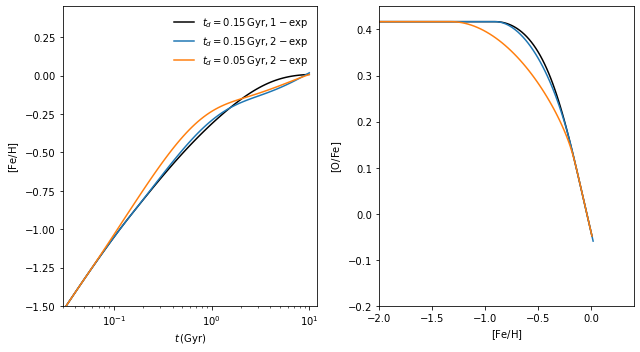

In [6]:
figsize(9,5)
oz.initial()
ts= numpy.logspace(-2.,1.,101)*u.Gyr
subplot(1,2,1)
semilogx(ts,oz.Fe_H(ts),color='k',label=r'$t_d = 0.15\,\mathrm{Gyr}, 1-\mathrm{exp}$')
ylim(-1.5,0.45)
xlabel(r'$t\,(\mathrm{Gyr})$')
ylabel(r'$[\mathrm{Fe/H}]$')
xlim(0.03,12.)
subplot(1,2,2)
plot(oz.Fe_H(ts),oz.O_Fe(ts),color='k')
xlim(-2.,0.4)
ylim(-0.2,0.45)
xlabel(r'$[\mathrm{Fe/H}]$')
ylabel(r'$[\mathrm{O/Fe}]$')
# min. delay time: 0.15 Gyr, t^{-1.1} approx
# change exponential decay times (set 2nd); default 2nd frac. is that for min_dt=0.15
oz.initial()
oz.tau_Ia= 0.5*u.Gyr
oz.tau_Ia_2= 5.*u.Gyr
subplot(1,2,1)
semilogx(ts,oz.Fe_H(ts),label=r'$t_d = 0.15\,\mathrm{Gyr}, 2-\mathrm{exp}$')
subplot(1,2,2)
plot(oz.Fe_H(ts),oz.O_Fe(ts))
# min. delay time: 0.05 Gyr, t^{-1.1} approx
# Now need to set all parameters, using values from Weinberg et al. (2017)
oz.initial()
oz.min_dt_Ia= 0.05*u.Gyr
oz.tau_Ia= 0.25*u.Gyr
oz.tau_Ia_2= 3.5*u.Gyr
oz.frac_Ia_2= 0.507
subplot(1,2,1)
semilogx(ts,oz.Fe_H(ts),label=r'$t_d = 0.05\,\mathrm{Gyr}, 2-\mathrm{exp}$')
subplot(1,2,2)
plot(oz.Fe_H(ts),oz.O_Fe(ts))
subplot(1,2,1)
legend(frameon=False)
tight_layout();

We can also compute the distribution of $[\mathrm{Fe/H}]$, $[\mathrm{O/H}]$, and $[\mathrm{O/Fe}]$. For example, we can re-create Fig. 5 in Weinberg et al. (2017):

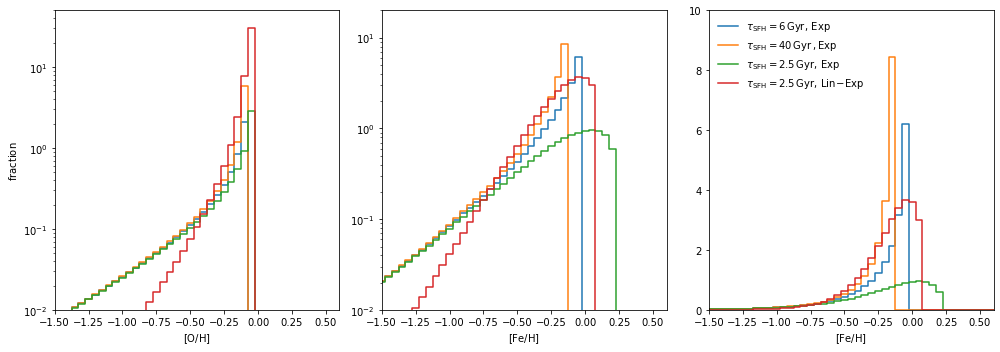

In [ ]:
figsize(14,5)
FeHs= numpy.linspace(-1.525,1.025,52)
OHs= numpy.linspace(-1.525,1.025,52)
oz.default()
oz.tau_SFH= 6.*u.Gyr
oz.sfh= 'exp'
y= [oz.O_H_DF(f)/4. for f in OHs]
subplot(1,3,1)
step(OHs,y)
y= [oz.Fe_H_DF(f)/4. for f in FeHs]
subplot(1,3,2)
step(FeHs,y)
subplot(1,3,3)
step(FeHs,y,
        label=r'$\tau_{\mathrm{SFH}} = 6\,\mathrm{Gyr},\, \mathrm{Exp}$')
oz.tau_SFH= 40*u.Gyr
y= [oz.O_H_DF(f)/4. for f in OHs]
subplot(1,3,1)
step(OHs,y)
y= [oz.Fe_H_DF(f)/4. for f in FeHs]
subplot(1,3,2)
step(FeHs,y)
subplot(1,3,3)
step(FeHs,y,
        label=r'$\tau_{\mathrm{SFH}} = 40\,\mathrm{Gyr}\,, \mathrm{Exp}$')
oz.tau_SFH= 2.5*u.Gyr
y= [oz.O_H_DF(f)/4. for f in OHs]
subplot(1,3,1)
step(OHs,y)
y= [oz.Fe_H_DF(f)/4. for f in FeHs]
subplot(1,3,2)
step(FeHs,y)
subplot(1,3,3)
step(FeHs,y,
        label=r'$\tau_{\mathrm{SFH}} = 2.5\,\mathrm{Gyr},\, \mathrm{Exp}$')
oz.sfh= 'lin-exp'
y= [oz.O_H_DF(f)/4. for f in OHs]
subplot(1,3,1)
step(OHs,y)
y= [oz.Fe_H_DF(f)/4. for f in FeHs]
subplot(1,3,2)
step(FeHs,y)
subplot(1,3,3)
step(FeHs,y,
        label=r'$\tau_{\mathrm{SFH}} = 2.5\,\mathrm{Gyr},\, \mathrm{Lin\!-\!Exp}$')
subplot(1,3,1)
xlabel(r'$[\mathrm{O/H}]$')
ylabel(r'$\mathrm{fraction}$')
xlim(-1.5,0.6)
ylim(0.01,50.)
yscale('log')
subplot(1,3,2)
xlabel(r'$[\mathrm{Fe/H}]$')
xlim(-1.5,0.6)
ylim(0.01,20.)
yscale('log')
subplot(1,3,3)
xlabel(r'$[\mathrm{Fe/H}]$')
xlim(-1.5,0.6)
ylim(0.0,10.)
legend(frameon=False)
tight_layout();

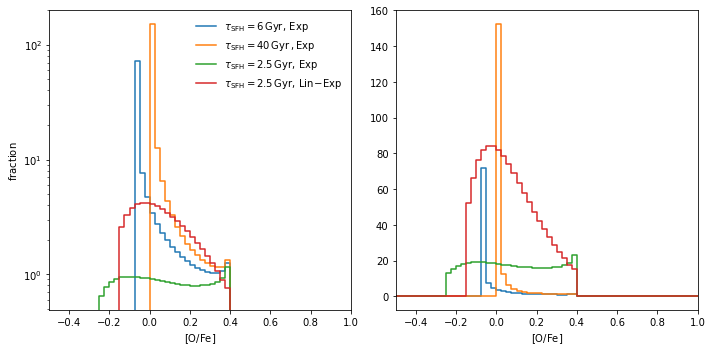

In [ ]:
figsize(10,5)
OFes= numpy.linspace(-0.5,1.,61)
oz.default()
oz.tau_SFH= 6.*u.Gyr
oz.sfh= 'exp'
y= [oz.O_Fe_DF(f)/4. for f in OFes]
subplot(1,2,1)
step(OFes,y,
        label=r'$\tau_{\mathrm{SFH}} = 6\,\mathrm{Gyr},\, \mathrm{Exp}$')
subplot(1,2,2)
step(OFes,y,
        label=r'$\tau_{\mathrm{SFH}} = 6\,\mathrm{Gyr},\, \mathrm{Exp}$')
oz.tau_SFH= 40*u.Gyr
y= [oz.O_Fe_DF(f)/4. for f in OFes]
subplot(1,2,1)
step(OFes,y,
        label=r'$\tau_{\mathrm{SFH}} = 40\,\mathrm{Gyr}\,, \mathrm{Exp}$')
subplot(1,2,2)
step(OFes,y,
        label=r'$\tau_{\mathrm{SFH}} = 40\,\mathrm{Gyr}\,, \mathrm{Exp}$')
oz.tau_SFH= 2.5*u.Gyr
y= [oz.O_Fe_DF(f)/4. for f in OFes]
subplot(1,2,1)
step(OFes,y,
        label=r'$\tau_{\mathrm{SFH}} = 2.5\,\mathrm{Gyr},\, \mathrm{Exp}$')
subplot(1,2,2)
y= numpy.array(y)*20
step(OFes,y,
        label=r'$\tau_{\mathrm{SFH}} = 2.5\,\mathrm{Gyr},\, \mathrm{Exp}$')
oz.sfh= 'lin-exp'
y= [oz.O_Fe_DF(f)/4. for f in OFes]
subplot(1,2,1)
step(OFes,y,
        label=r'$\tau_{\mathrm{SFH}} = 2.5\,\mathrm{Gyr},\, \mathrm{Lin\!-\!Exp}$')
subplot(1,2,2)
y= numpy.array(y)*20
step(OFes,y,
        label=r'$\tau_{\mathrm{SFH}} = 2.5\,\mathrm{Gyr},\, \mathrm{Lin\!-\!Exp}$')
subplot(1,2,1)
xlabel(r'$[\mathrm{O/Fe}]$')
ylabel(r'$\mathrm{fraction}$')
xlim(-0.5,1.)
yscale('log')
legend(frameon=False)
subplot(1,2,2)
xlabel(r'$[\mathrm{O/Fe}]$')
xlim(-0.5,1.)
tight_layout();

We can also re-create Fig. 6:

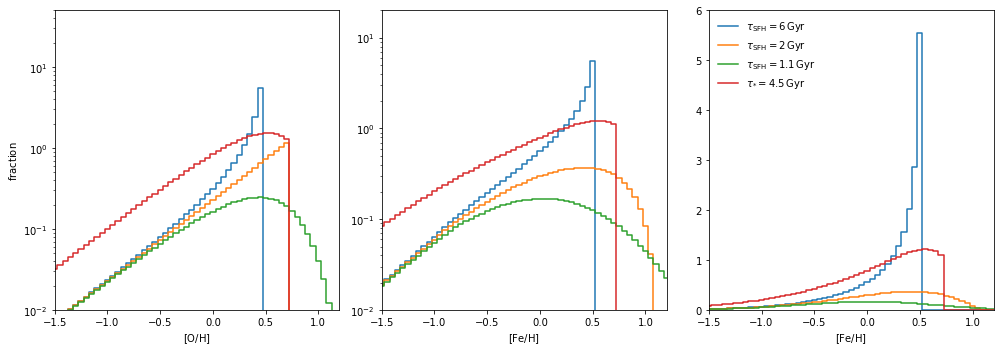

In [ ]:
figsize(14,5)
FeHs= numpy.linspace(-1.525,1.225,56)
OHs= numpy.linspace(-1.525,1.225,56)
oz.default()
oz.eta= 0.
oz.r= 0.
oz.tau_SFH= 6.*u.Gyr
oz.sfh= 'exp'
y= [oz.O_H_DF(f)/4. for f in OHs]
subplot(1,3,1)
step(OHs,y)
y= [oz.Fe_H_DF(f)/4. for f in FeHs]
subplot(1,3,2)
step(FeHs,y)
subplot(1,3,3)
step(FeHs,y,
        label=r'$\tau_{\mathrm{SFH}} = 6\,\mathrm{Gyr}$')
oz.tau_SFH= 2*u.Gyr
y= [oz.O_H_DF(f)/4. for f in OHs]
subplot(1,3,1)
step(OHs,y)
y= [oz.Fe_H_DF(f)/4. for f in FeHs]
subplot(1,3,2)
step(FeHs,y)
subplot(1,3,3)
step(FeHs,y,
        label=r'$\tau_{\mathrm{SFH}} = 2\,\mathrm{Gyr}$')
oz.tau_SFH= 1.1*u.Gyr
y= [oz.O_H_DF(f)/4. for f in OHs]
subplot(1,3,1)
step(OHs,y)
y= [oz.Fe_H_DF(f)/4. for f in FeHs]
subplot(1,3,2)
step(FeHs,y)
subplot(1,3,3)
step(FeHs,y,
        label=r'$\tau_{\mathrm{SFH}} = 1.1\,\mathrm{Gyr}$')
oz.tau_SFH= 6.*u.Gyr
oz.tau_SFE= 4.5*u.Gyr
y= [oz.O_H_DF(f)/4. for f in OHs]
subplot(1,3,1)
step(OHs,y)
y= [oz.Fe_H_DF(f)/4. for f in FeHs]
subplot(1,3,2)
step(FeHs,y)
subplot(1,3,3)
step(FeHs,y,
        label=r'$\tau_{*} = 4.5\,\mathrm{Gyr}$')
subplot(1,3,1)
xlabel(r'$[\mathrm{O/H}]$')
ylabel(r'$\mathrm{fraction}$')
xlim(-1.5,1.2)
ylim(0.01,50.)
yscale('log')
subplot(1,3,2)
xlabel(r'$[\mathrm{Fe/H}]$')
xlim(-1.5,1.2)
ylim(0.01,20.)
yscale('log')
subplot(1,3,3)
xlabel(r'$[\mathrm{Fe/H}]$')
xlim(-1.5,1.2)
ylim(0.0,6.)
legend(frameon=False)
tight_layout();